In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

Read Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Disease Data_40 /dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
del df['Symptom_7']
del df['Symptom_8']
del df['Symptom_9']
del df['Symptom_10']
del df['Symptom_11']
del df['Symptom_12']
del df['Symptom_13']
del df['Symptom_14']
del df['Symptom_15']
del df['Symptom_16']
del df['Symptom_17']

In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN


Dataset characteristics

In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
count,4920,4920,4920,4920,4572,3714,2934
unique,41,34,48,54,50,38,32
top,Hepatitis B,vomiting,vomiting,fatigue,high_fever,headache,nausea
freq,120,822,870,726,378,348,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    4920 non-null   object
 1   Symptom_1  4920 non-null   object
 2   Symptom_2  4920 non-null   object
 3   Symptom_3  4920 non-null   object
 4   Symptom_4  4572 non-null   object
 5   Symptom_5  3714 non-null   object
 6   Symptom_6  2934 non-null   object
dtypes: object(7)
memory usage: 269.2+ KB


Check for null and NaN values

In [ ]:
df.isnull().sum()

Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
dtype: int64

Text(0, 0.5, 'Number')

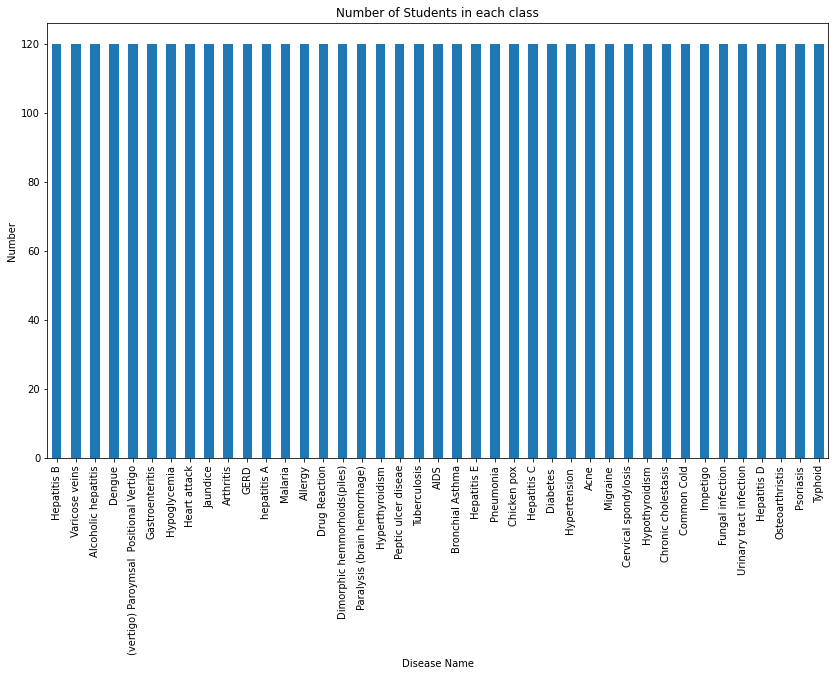

In [ ]:
ax = df['Disease'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Students in each class")
ax.set_xlabel("Disease Name")
ax.set_ylabel("Number")

Text(0, 0.5, 'Number')

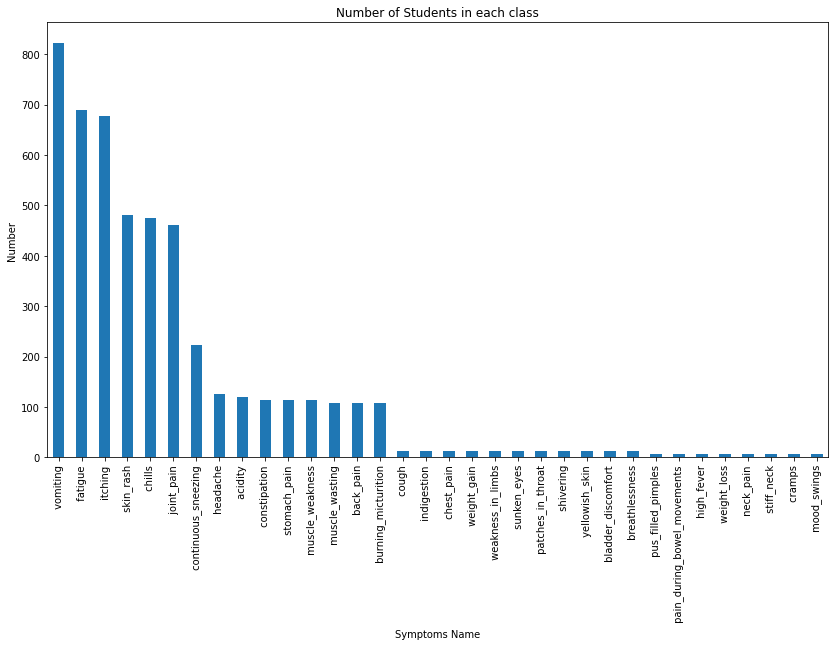

In [ ]:
ax = df['Symptom_1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Students in each class")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

Text(0, 0.5, 'Number')

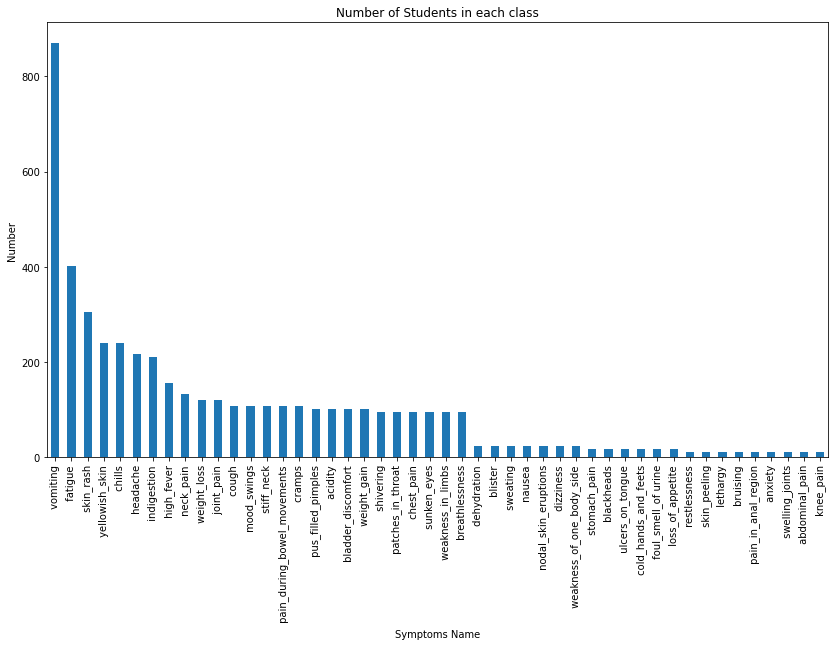

In [ ]:
ax = df['Symptom_2'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Students in each class")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

Text(0, 0.5, 'Number')

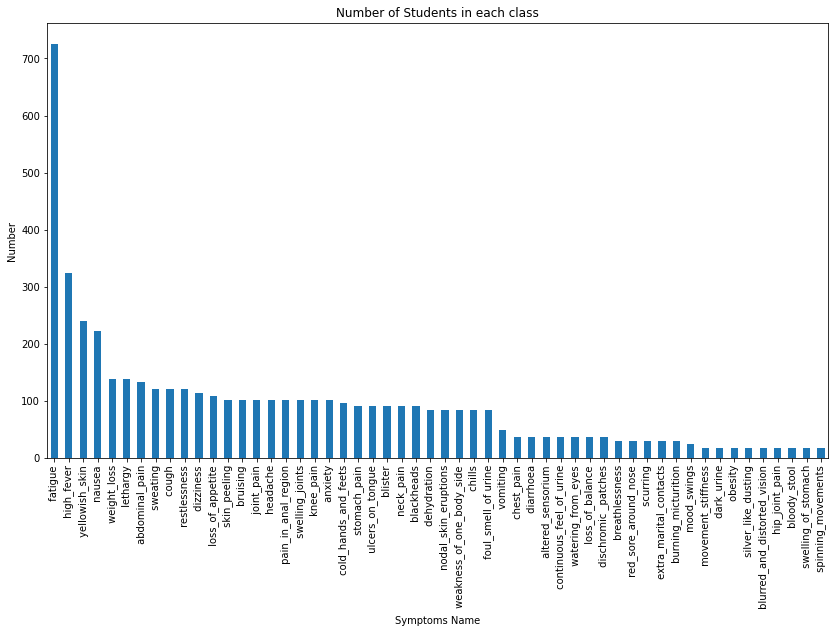

In [ ]:
ax = df['Symptom_3'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Students in each class")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

Text(0, 0.5, 'Number')

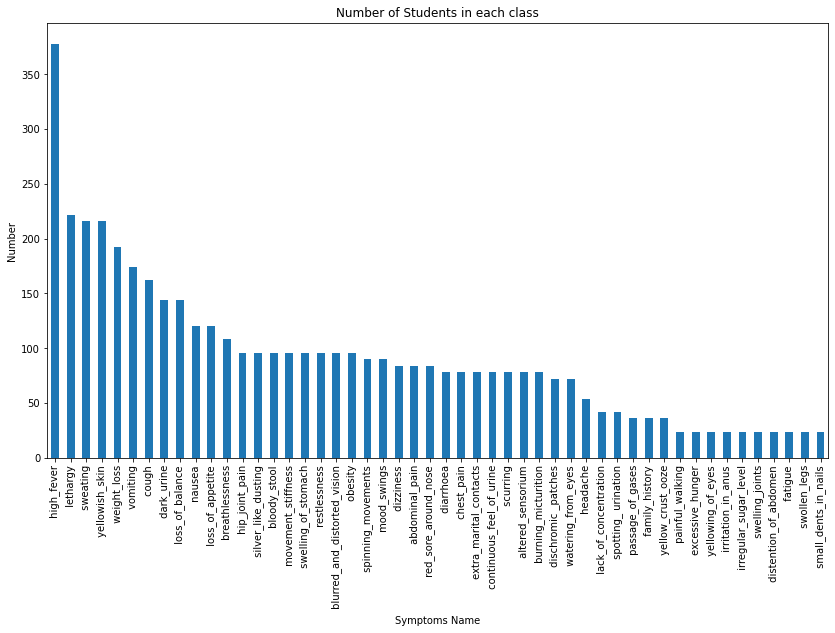

In [ ]:
ax = df['Symptom_4'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Students in each class")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

Text(0, 0.5, 'Number')

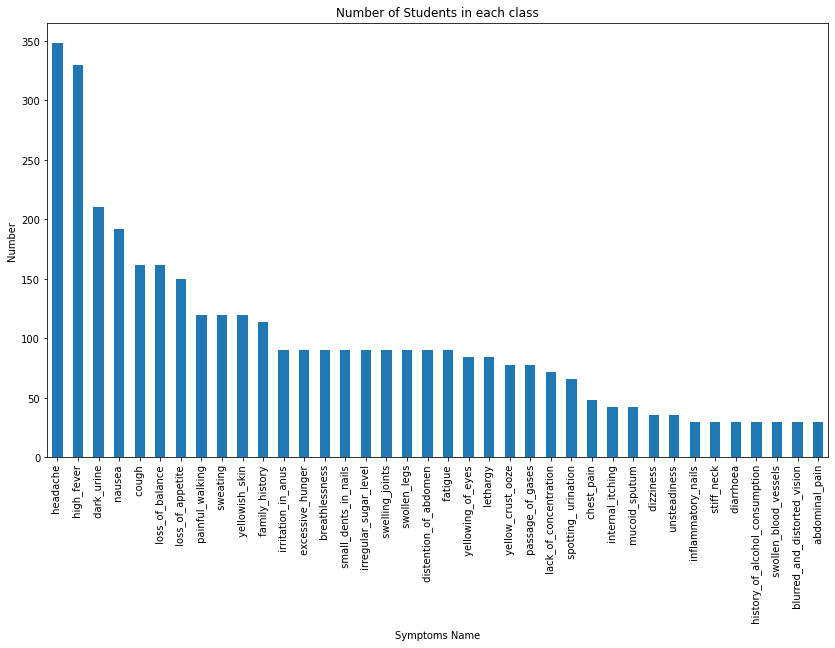

In [ ]:
ax = df['Symptom_5'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Students in each class")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

Text(0, 0.5, 'Number')

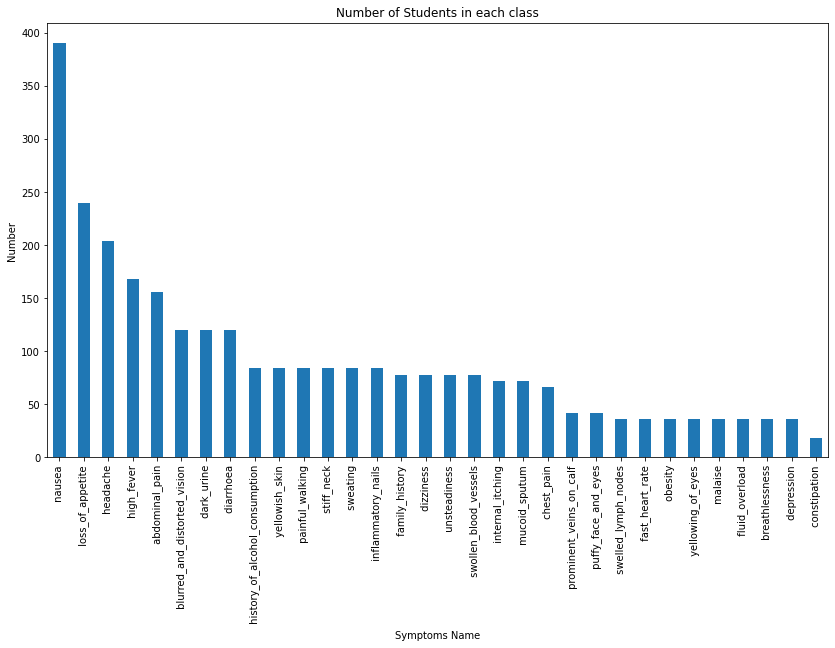

In [ ]:
ax = df['Symptom_6'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Students in each class")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

Remove the trailing space from the symptom columns

In [ ]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN


RelPlot

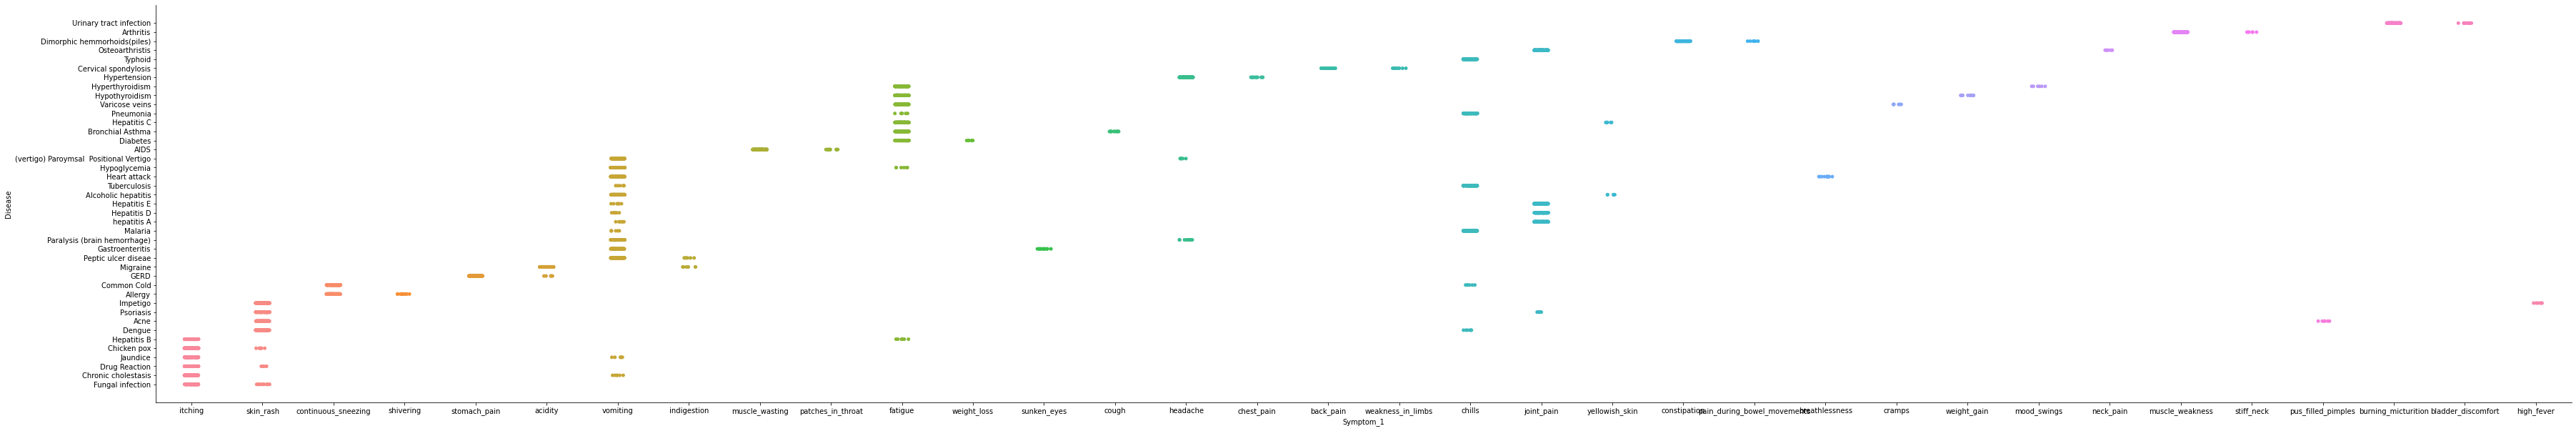

In [ ]:

sns.catplot(data=df, x='Symptom_1', y='Disease', height=8.27, aspect=50/8.27)

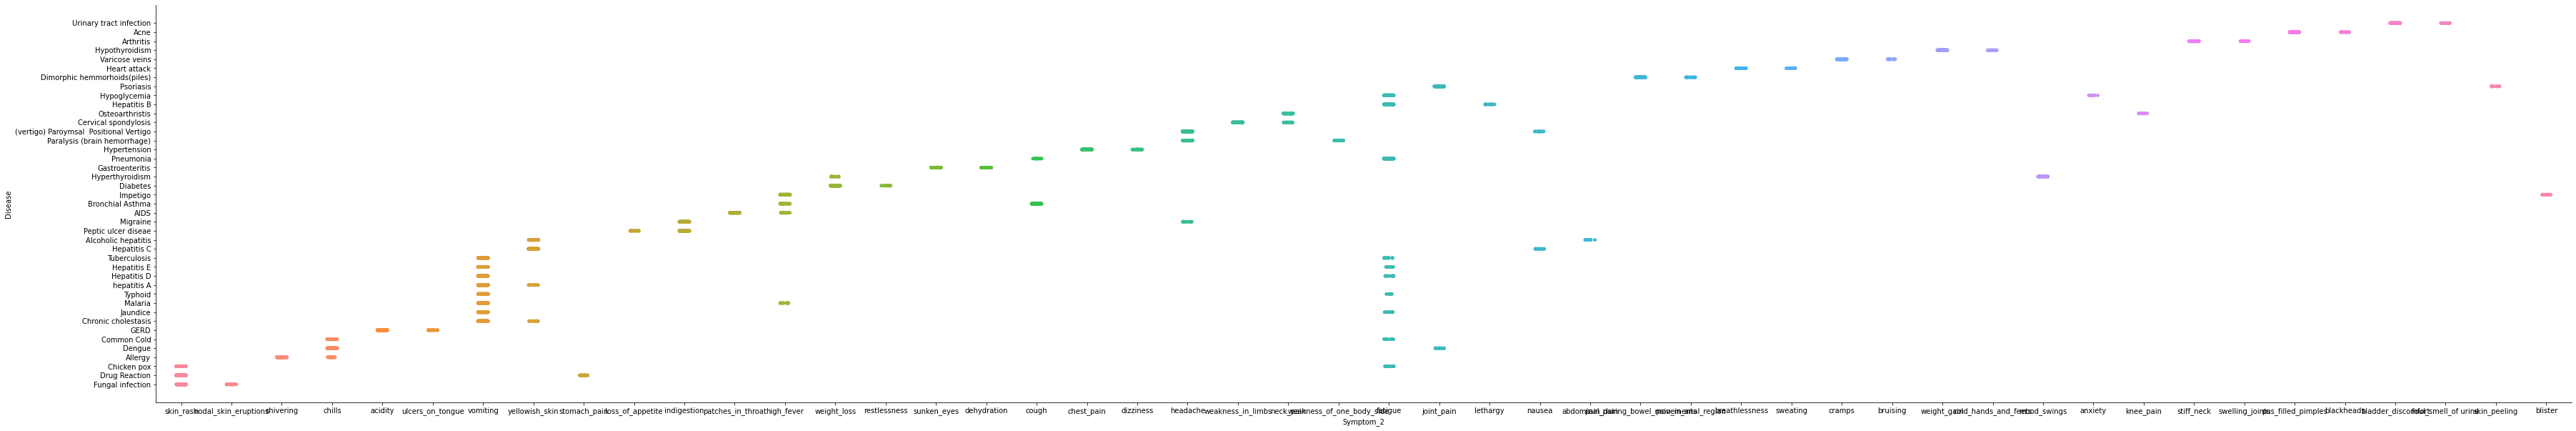

In [ ]:

sns.catplot(data=df, x='Symptom_2', y='Disease', height=8.27, aspect=50/8.27)

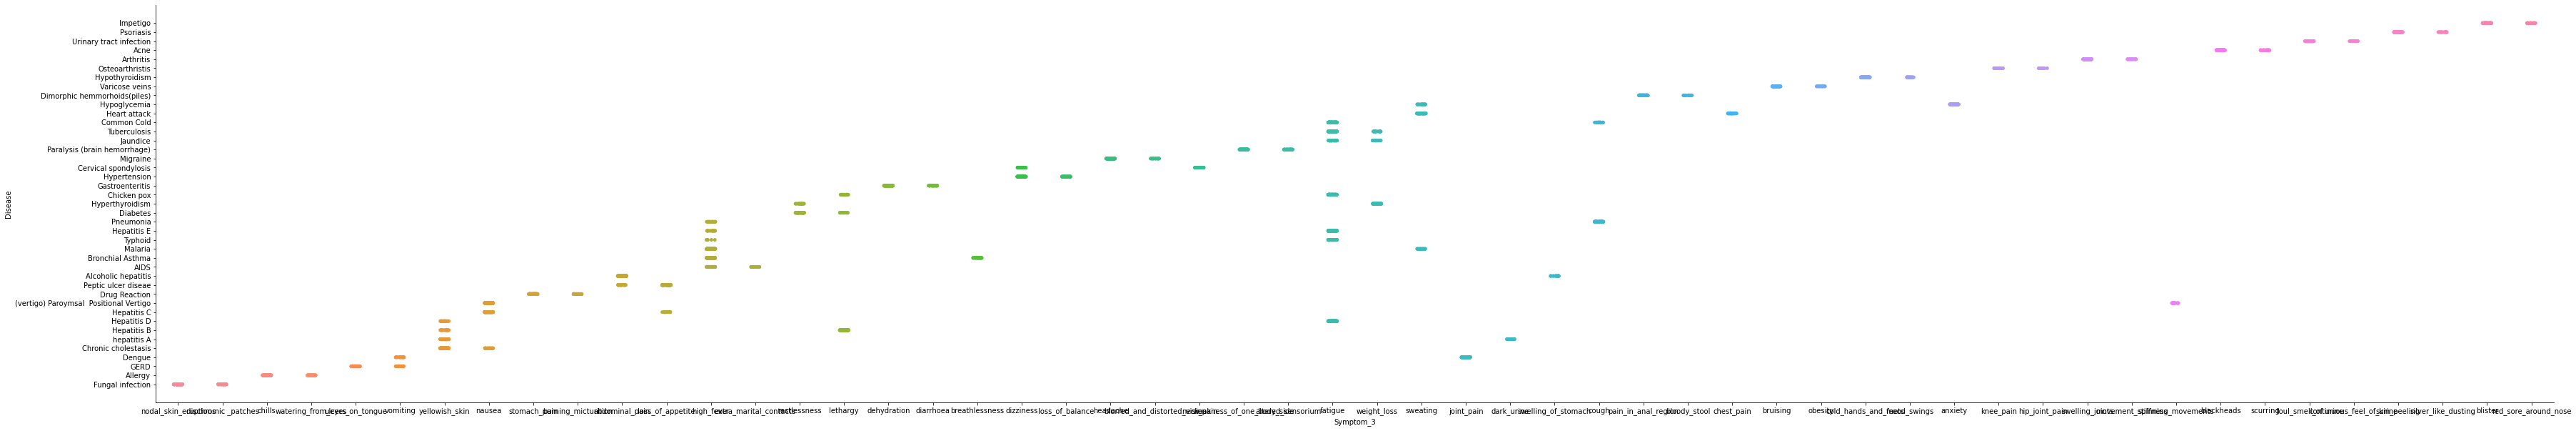

In [ ]:

sns.catplot(data=df, x='Symptom_3', y='Disease', height=8.27, aspect=50/8.27)

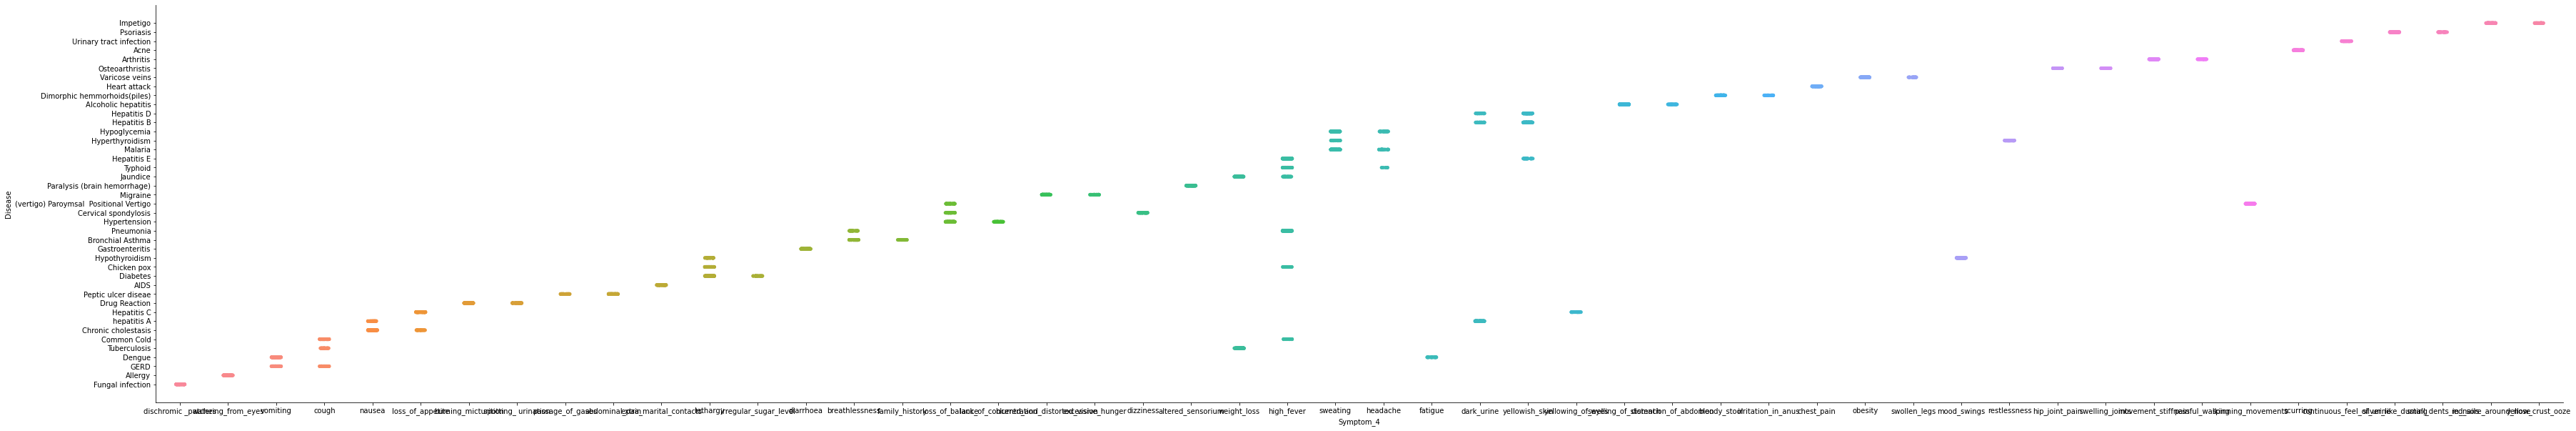

In [ ]:

sns.catplot(data=df, x='Symptom_4', y='Disease', height=8.27, aspect=50/8.27)

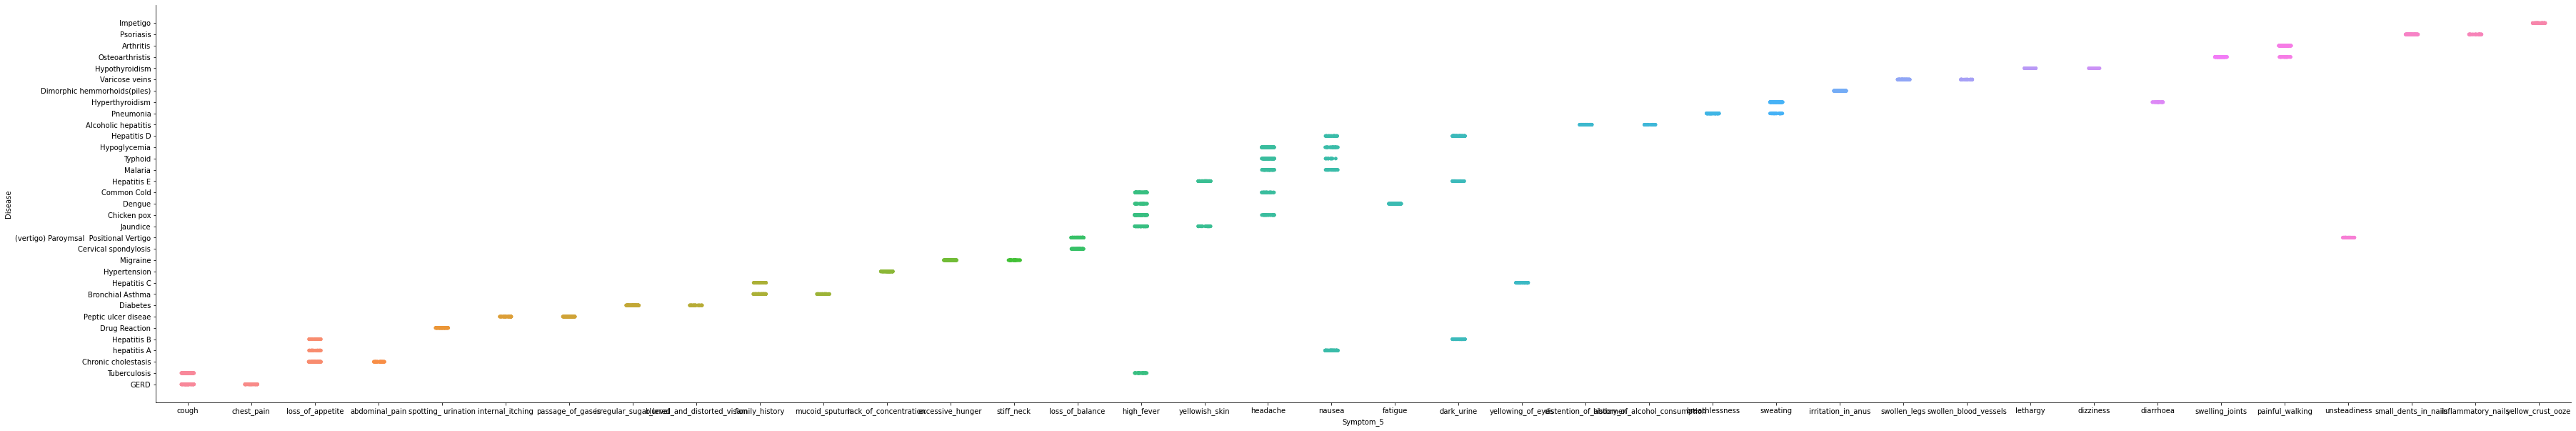

In [ ]:

sns.catplot(data=df, x='Symptom_5', y='Disease', height=8.27, aspect=50/8.27)

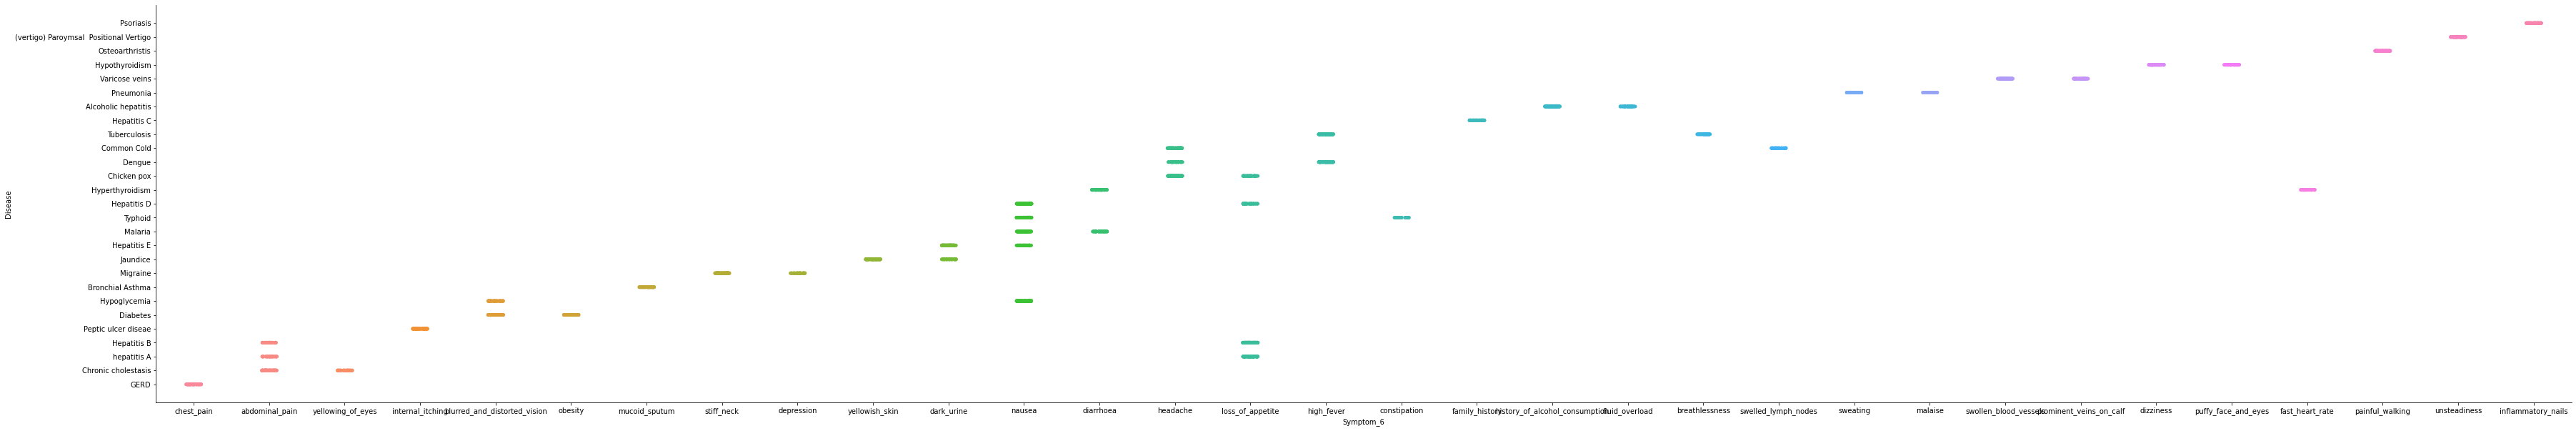

In [ ]:

sns.catplot(data=df, x='Symptom_6', y='Disease', height=8.27, aspect=50/8.27)

Fill the NaN values with zero

In [ ]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0


Read Symptom severity rank file

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Disease Data_40 /Symptom-severity.csv')
df1.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


Get overall list of symptoms

In [ ]:
df1['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

Encode symptoms in the data with the symptom rank

In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,1,3,4,dischromic _patches,0,0
1,Fungal infection,3,4,dischromic _patches,0,0,0
2,Fungal infection,1,4,dischromic _patches,0,0,0
3,Fungal infection,1,3,dischromic _patches,0,0,0
4,Fungal infection,1,3,4,0,0,0


Assign symptoms with no rank to zero

In [ ]:
d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,1,3,4,0,0,0
1,Fungal infection,3,4,0,0,0,0
2,Fungal infection,1,4,0,0,0,0
3,Fungal infection,1,3,0,0,0,0
4,Fungal infection,1,3,4,0,0,0


Check if entire columns have zero values so we can drop those values

In [ ]:
(df[cols] == 0).all()

Disease      False
Symptom_1    False
Symptom_2    False
Symptom_3    False
Symptom_4    False
Symptom_5    False
Symptom_6    False
dtype: bool

In [ ]:
df['Disease'].value_counts()

Hepatitis B                                120
Diabetes                                   120
Dengue                                     120
(vertigo) Paroymsal  Positional Vertigo    120
Hypertension                               120
Gastroenteritis                            120
Hypoglycemia                               120
Heart attack                               120
Jaundice                                   120
Arthritis                                  120
GERD                                       120
hepatitis A                                120
Malaria                                    120
Allergy                                    120
Drug Reaction                              120
Dimorphic hemmorhoids(piles)               120
Paralysis (brain hemorrhage)               120
Hyperthyroidism                            120
Peptic ulcer diseae                        120
Alcoholic hepatitis                        120
Tuberculosis                               120
Bronchial Ast

Get the names of diseases from data

In [ ]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Mean Avarage

In [ ]:
df.describe()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,3.410976,4.147561,4.043902,3.828049,3.114634,2.654878
std,1.316310,1.232387,1.390184,1.921436,2.169638,2.384472
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


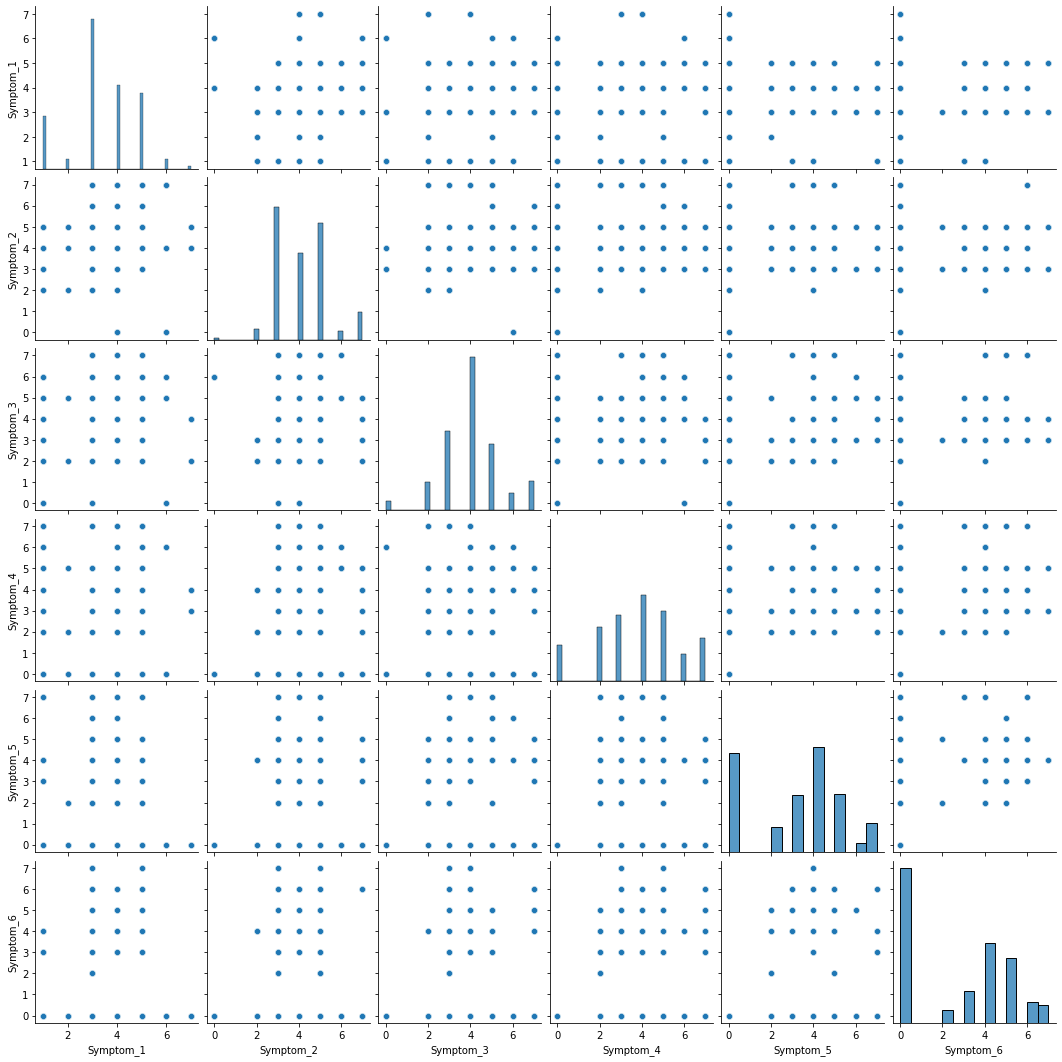

In [ ]:
sns.pairplot(df)

Correlation Matrix

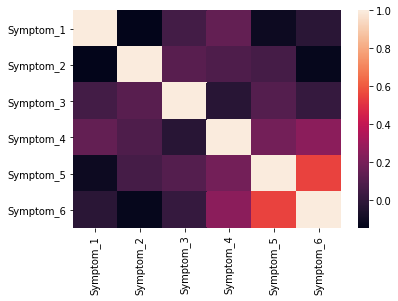

In [ ]:
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Bivarent Exploration

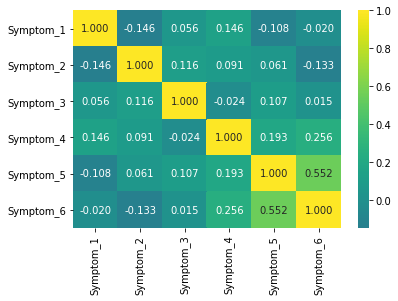

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show()

data splitting

In [ ]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

One-hot Encoding

In [ ]:
data1 = pd.get_dummies(data = df)
data1.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Disease_(vertigo) Paroymsal Positional Vertigo,Disease_AIDS,Disease_Acne,Disease_Alcoholic hepatitis,Disease_Allergy,Disease_Arthritis,Disease_Bronchial Asthma,Disease_Cervical spondylosis,Disease_Chicken pox,Disease_Chronic cholestasis,Disease_Common Cold,Disease_Dengue,Disease_Diabetes,Disease_Dimorphic hemmorhoids(piles),Disease_Drug Reaction,Disease_Fungal infection,Disease_GERD,Disease_Gastroenteritis,Disease_Heart attack,Disease_Hepatitis B,Disease_Hepatitis C,Disease_Hepatitis D,Disease_Hepatitis E,Disease_Hypertension,Disease_Hyperthyroidism,Disease_Hypoglycemia,Disease_Hypothyroidism,Disease_Impetigo,Disease_Jaundice,Disease_Malaria,Disease_Migraine,Disease_Osteoarthristis,Disease_Paralysis (brain hemorrhage),Disease_Peptic ulcer diseae,Disease_Pneumonia,Disease_Psoriasis,Disease_Tuberculosis,Disease_Typhoid,Disease_Urinary tract infection,Disease_Varicose veins,Disease_hepatitis A
0,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Select the features as symptoms column and label as Disease column

Split the data, labels with shuffle

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data1, labels, shuffle=True, train_size = 0.75)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3690, 47) (1230, 47) (3690,) (1230,)


Initialize and train a Support vector classifier

In [ ]:
model = SVC()
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
preds = model.predict(x_test)

Plot the confusion matrix and calculate f1, accuracy

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
precision = precision_score(y_test, preds,average='macro')*100
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds,average='macro')*100
print('Recall: %f' % recall)

F1-score% = 96.8701361345918 | Accuracy% = 96.91056910569105
Precision: 97.109214
Recall: 96.883932


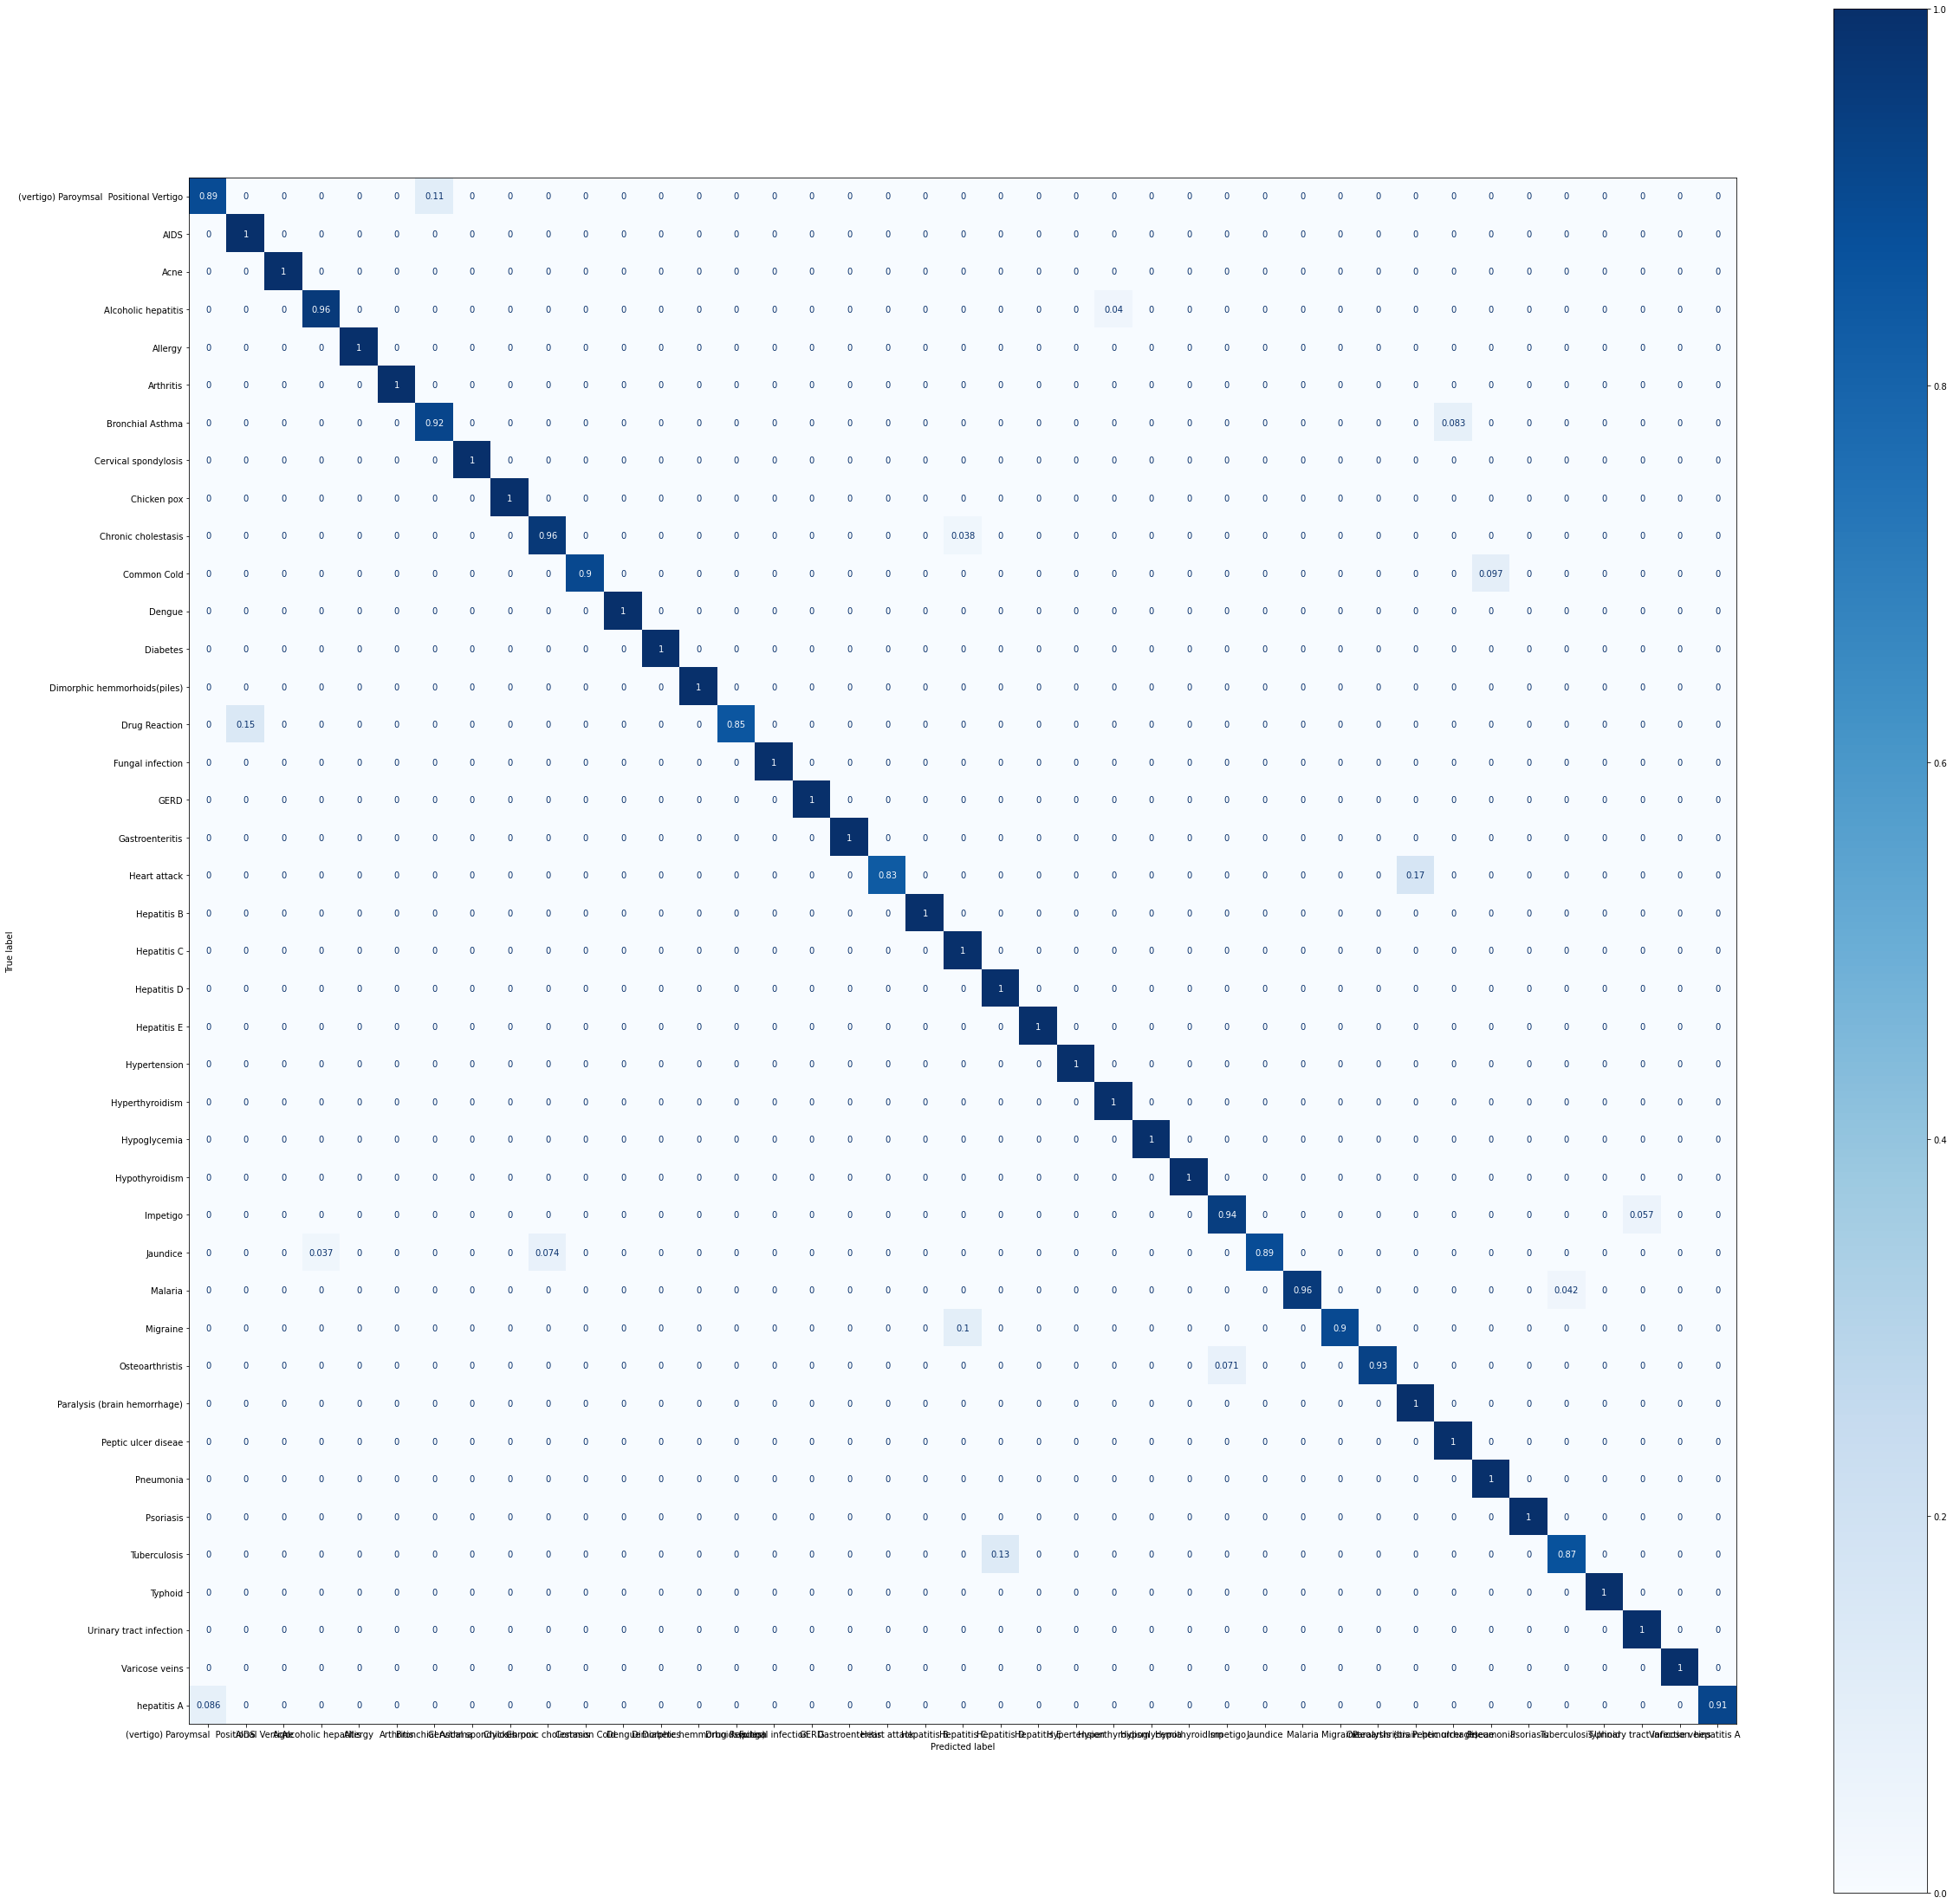

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, preds, labels=df['Disease'].unique())

fig, ax = plt.subplots(figsize=(40, 40))
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

Random FOrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_b = RandomForestClassifier()
clf_b.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
preds = clf_b.predict(x_test)

In [ ]:
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
precision = precision_score(y_test, preds,average='macro')*100
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds,average='macro')*100
print('Recall: %f' % recall)

F1-score% = 100.0 | Accuracy% = 100.0
Precision: 100.000000
Recall: 100.000000


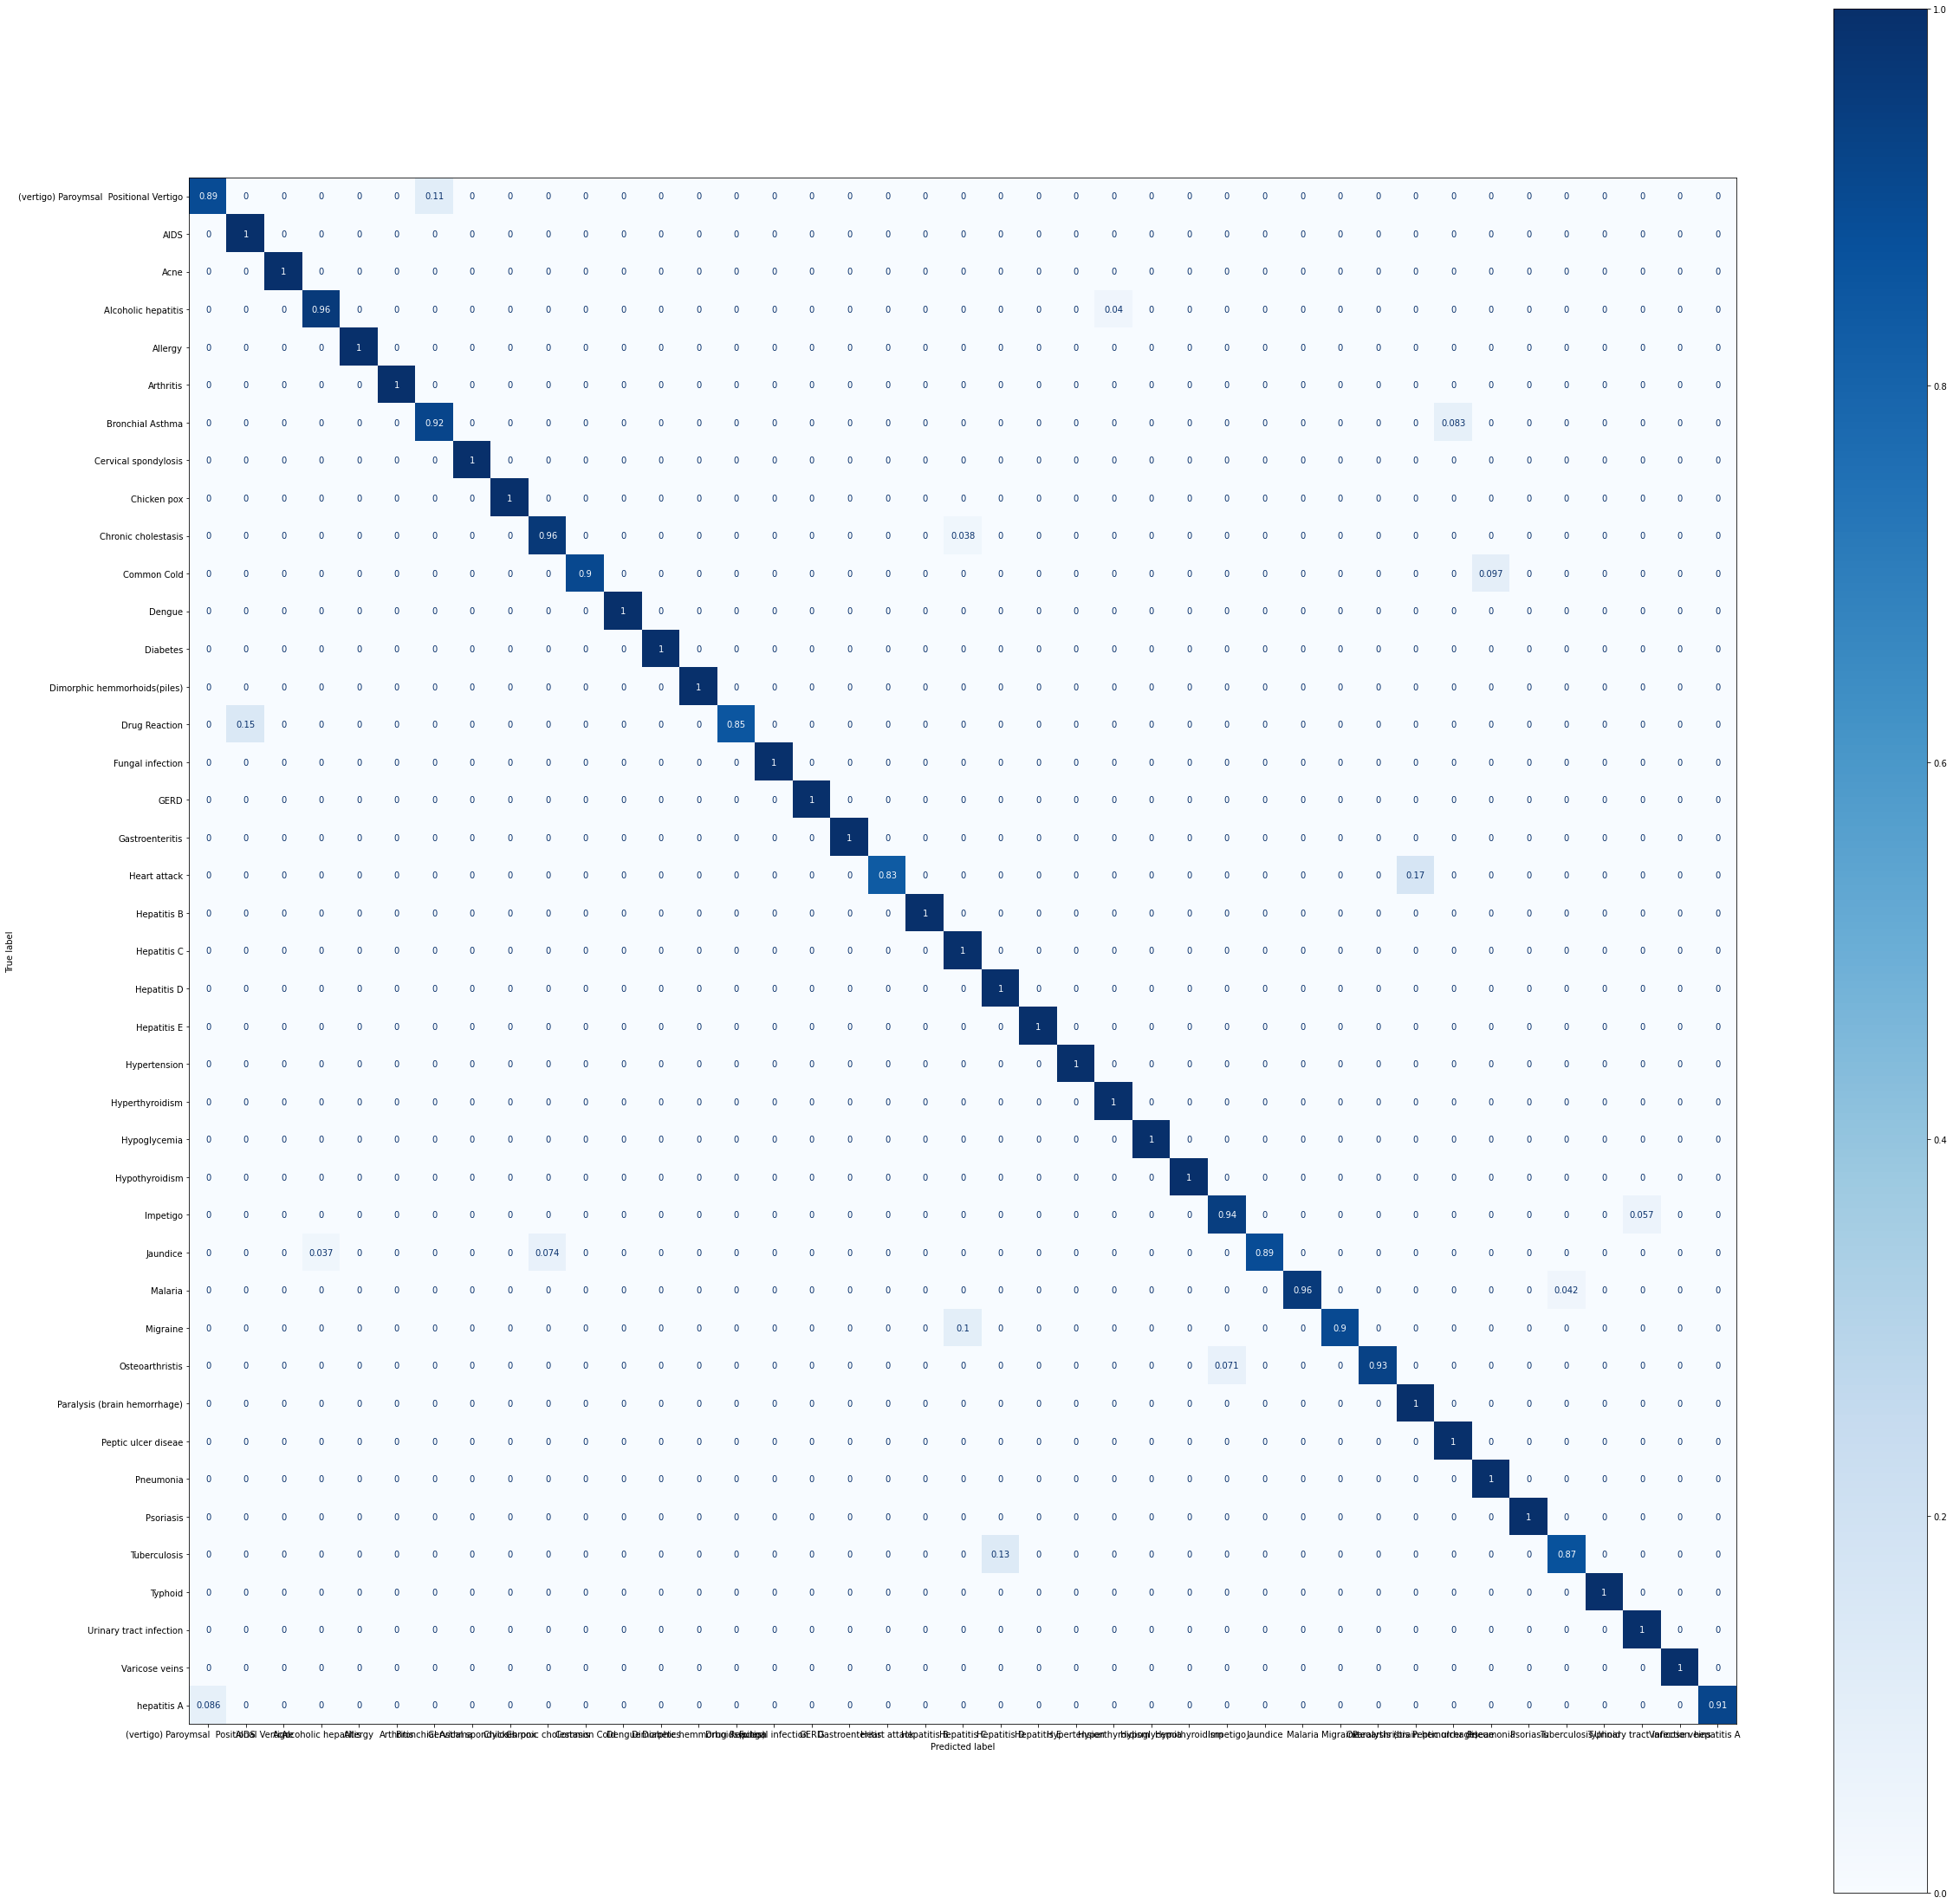

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, preds, labels=df['Disease'].unique())

fig, ax = plt.subplots(figsize=(40, 40))
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

Decision Tree

In [ ]:
from sklearn import tree

clf_c = tree.DecisionTreeClassifier()
clf_c.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
preds = clf_c.predict(x_test)

In [ ]:
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
precision = precision_score(y_test, preds,average='macro')*100
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds,average='macro')*100
print('Recall: %f' % recall)

F1-score% = 100.0 | Accuracy% = 100.0
Precision: 100.000000
Recall: 100.000000


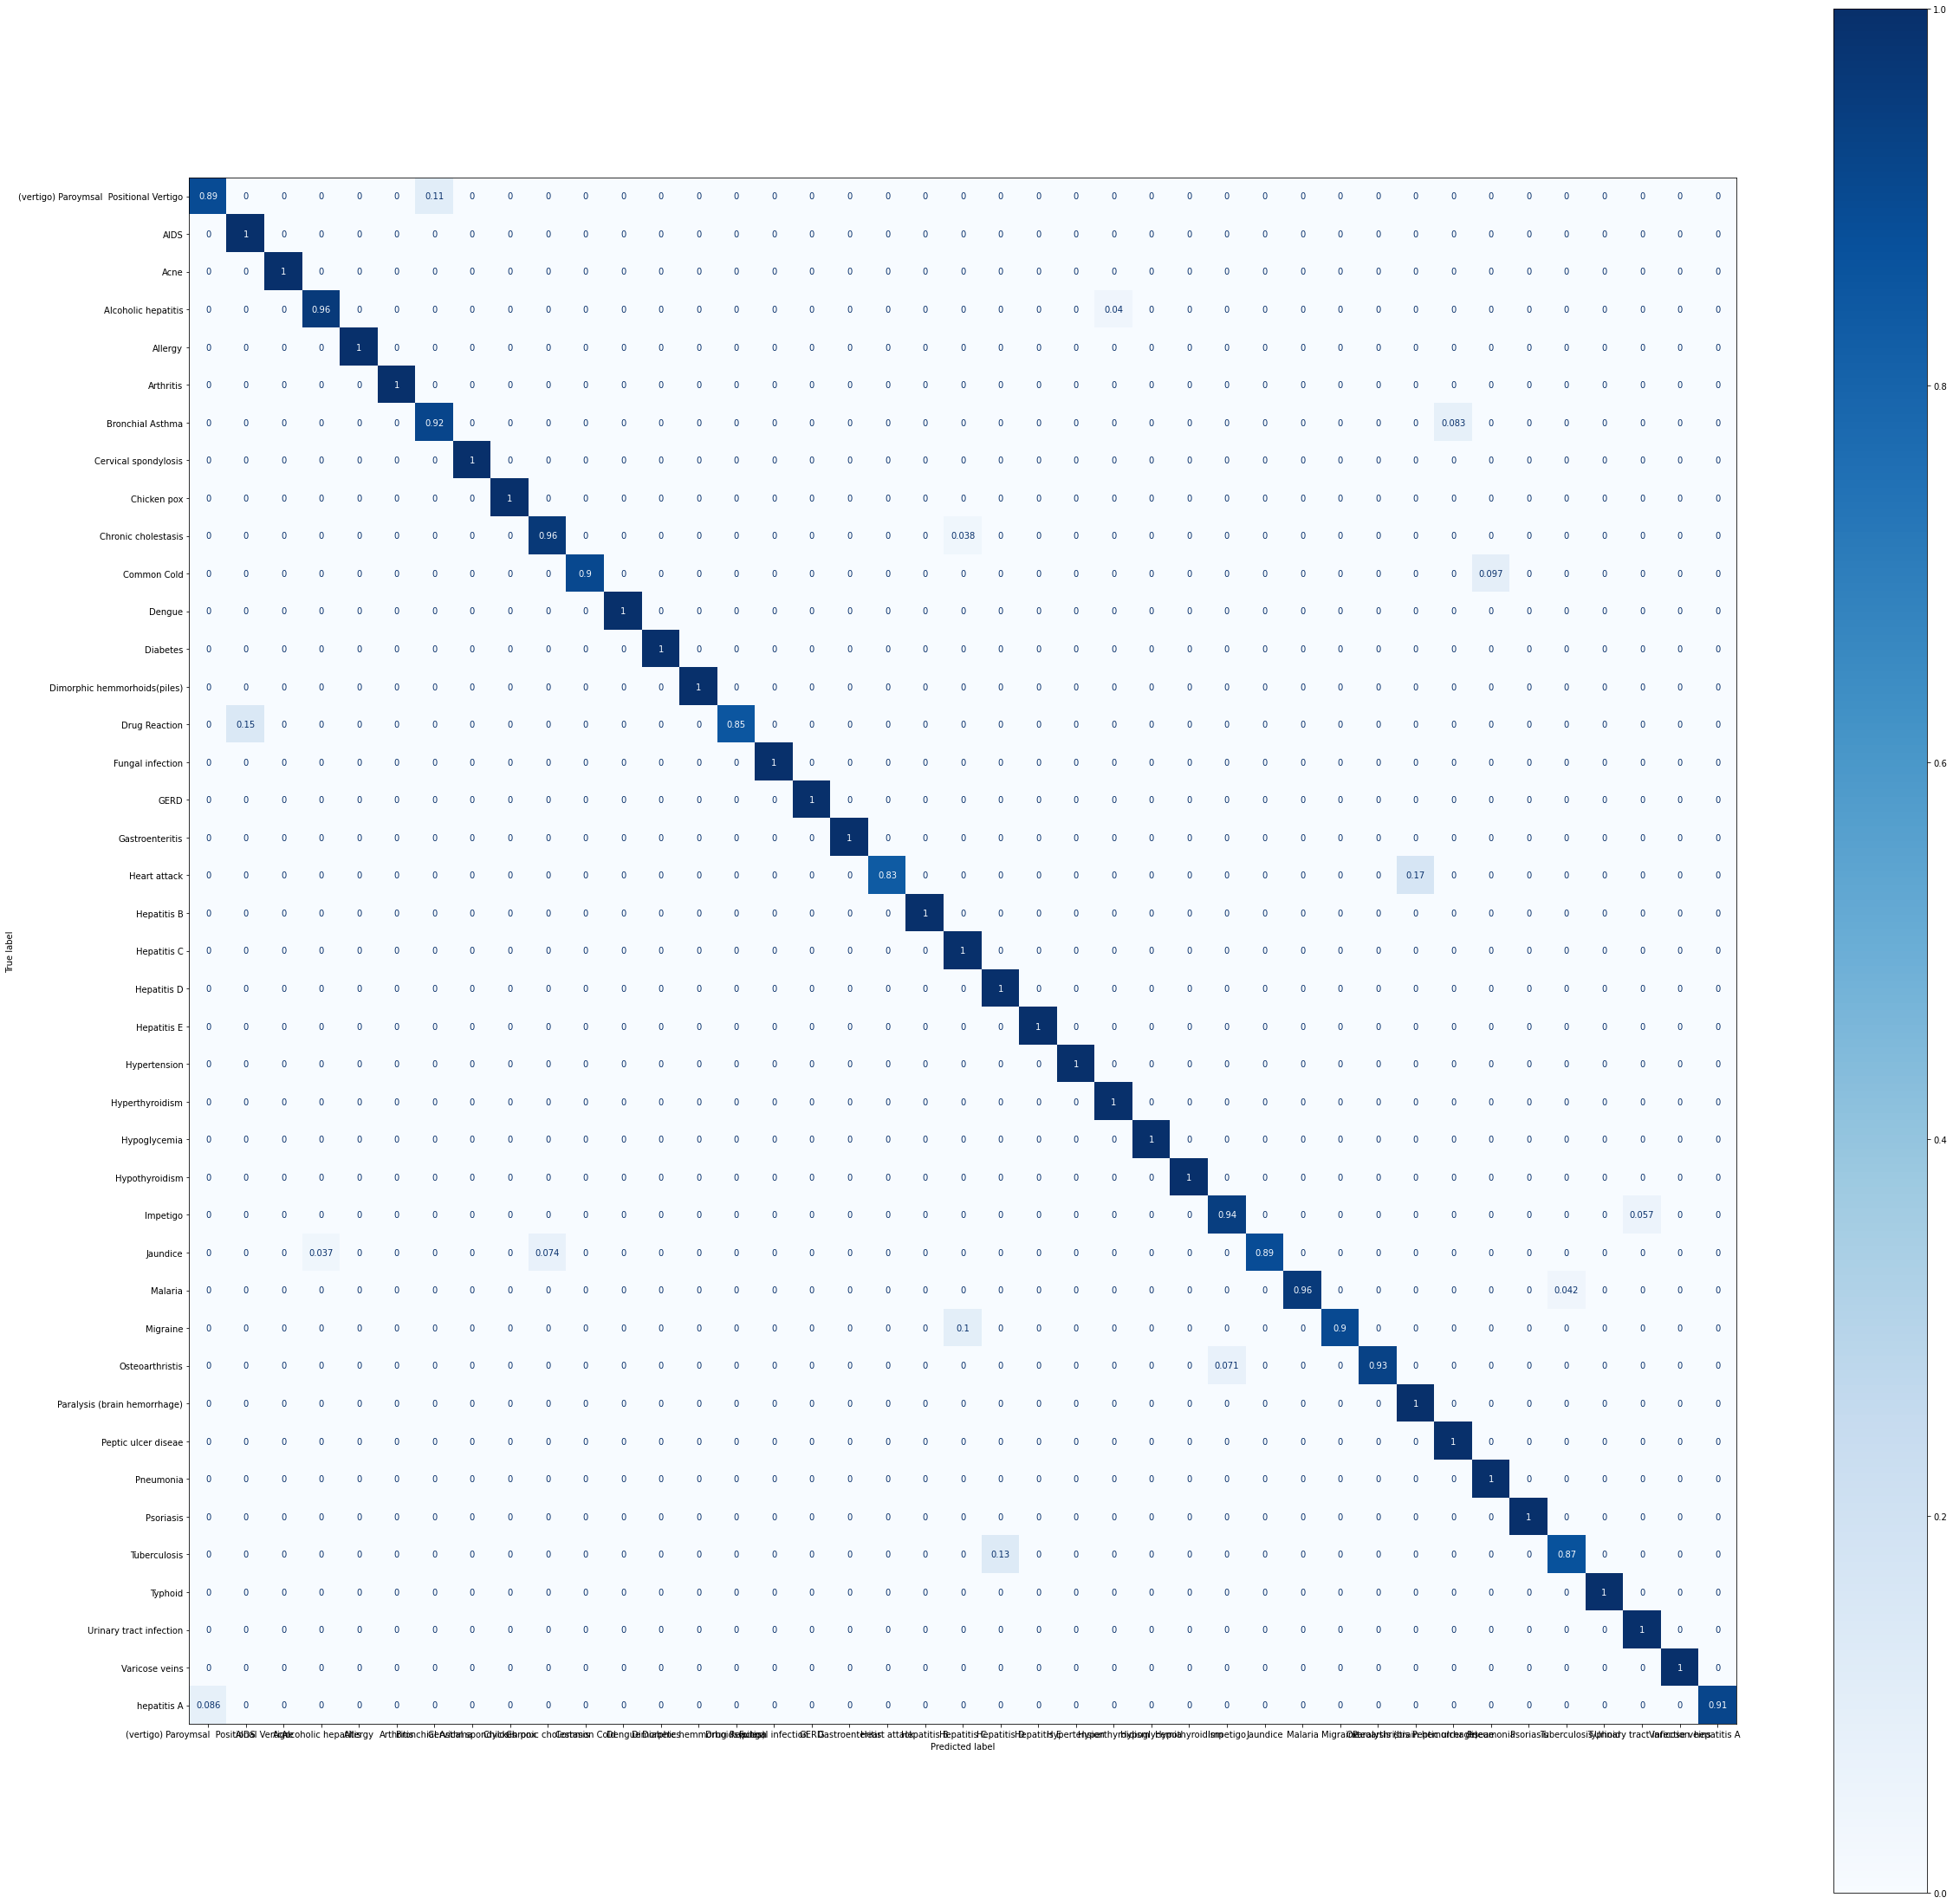

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, preds, labels=df['Disease'].unique())

fig, ax = plt.subplots(figsize=(40, 40))
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()